In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.lda_model

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
 
import jieba
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 训练LDA模型
def train_lda_model(documents, num_topics, max_iter):
    # 使用TF-IDF对文档进行向量化
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(documents)
    
    # 训练LDA模型
    lda = LatentDirichletAllocation(n_components=num_topics, max_iter=max_iter, learning_method='online', learning_offset=50.,random_state=0)
    lda.fit(tfidf)
    
    return lda, tfidf_vectorizer

In [3]:
positive_data = pd.read_csv('jd_data_pos.csv')
middle_data = pd.read_csv('jd_data_mid.csv')
negative_data = pd.read_csv('jd_data_neg.csv')

all_data = pd.concat([positive_data, middle_data, negative_data], ignore_index=True)
all_data

,Unnamed: 0,creationTime,hour,nickname,productType,score,content,days
0,0,2024-09-11 22:13:43,22,"""二***3""","""【超能轻薄】Pro14英寸 OLED高刷""",5,"""运行速度：很快 跟老电脑比简直像火箭一样\n屏幕效果：通透 早知道买16寸了\n散热性能：...","1,""afterDays"":0"
1,1,2024-09-01 09:36:41,9,"""j***e""","""【超能轻薄】Pro14英寸 OLED高刷""",5,"""酷睿Ultra的处理器很流畅\n适应现在ai时代的ai电脑\n非常喜欢，以后使用一些ai的...","2,""afterDays"":0"
2,2,2024-09-07 10:58:03,10,"""峥***弟""","""【超能轻薄】Pro14英寸 OLED高刷""",5,"""酷睿Ultra很牛！智能AI、联想AI、酷睿AI！牛的！质量很好！新电脑用这特别舒服，还记...","3,""afterDays"":0"
3,3,2024-09-14 12:38:30,12,"""陌***y""","""【性能大屏】Pro16英寸 2.5K高刷""",5,"""真的强烈推荐，一分钱一分货，现在有政府补贴，价格已经冰点，非常值得入手。电脑运行速度快，续...","1,""afterDays"":11"
4,4,2024-09-13 22:49:04,22,"""j***O""","""【超能轻薄】Pro14英寸 OLED高刷""",5,"""酷睿Ultra用起来真的很好，速度快，智能化。同时笔记本设计也很新潮，美观，非常让人喜欢。...","2,""afterDays"":0"
...,...,...,...,...,...,...,...,...
2726,995,2024-09-03 15:51:43,15,"""忆***荐""","""【性能大屏】Pro16英寸 2.5K高刷""",1,"""收到新电脑本来满怀期待的，结果一开机就蓝屏重启，并且出现好几次。这质量品控真的让人失望！旧...","1,""afterDays"":0"
2727,996,2023-10-30 21:13:12,21,"""j***1""","""【性能小钢炮】Pro16 2.5K高刷屏""",1,"""玛德，电脑就是一个组装机，卡的要死，做个Word文档都能卡死才买了一个月，刚来的时候就卡，...","24,""afterDays"":0"
2728,997,2024-08-24 19:50:58,19,"""美***r""","""【超能轻薄】Pro14英寸 2.8K高刷""",1,"""很糟糕的购物体验，一直对京东的商品品质很认可，所以很多耐用性的东西都在京东买。这次买的联想...","20,""afterDays"":0"
2729,998,2024-06-19 23:29:37,23,"""D***i""","""【性能大屏】Pro16英寸 2.5K高刷""",1,"""2024年615零点下单就是坑，啥618活动，加入购物车前写着的赠品啥的都没了，买个裸机我...","4,""afterDays"":0"


In [4]:
def preprocess_text(text):
    text = text.strip()
    return text

all_data['content'] = all_data['content'].apply(preprocess_text)
all_data

,Unnamed: 0,creationTime,hour,nickname,productType,score,content,days
0,0,2024-09-11 22:13:43,22,"""二***3""","""【超能轻薄】Pro14英寸 OLED高刷""",5,"""运行速度：很快 跟老电脑比简直像火箭一样\n屏幕效果：通透 早知道买16寸了\n散热性能：...","1,""afterDays"":0"
1,1,2024-09-01 09:36:41,9,"""j***e""","""【超能轻薄】Pro14英寸 OLED高刷""",5,"""酷睿Ultra的处理器很流畅\n适应现在ai时代的ai电脑\n非常喜欢，以后使用一些ai的...","2,""afterDays"":0"
2,2,2024-09-07 10:58:03,10,"""峥***弟""","""【超能轻薄】Pro14英寸 OLED高刷""",5,"""酷睿Ultra很牛！智能AI、联想AI、酷睿AI！牛的！质量很好！新电脑用这特别舒服，还记...","3,""afterDays"":0"
3,3,2024-09-14 12:38:30,12,"""陌***y""","""【性能大屏】Pro16英寸 2.5K高刷""",5,"""真的强烈推荐，一分钱一分货，现在有政府补贴，价格已经冰点，非常值得入手。电脑运行速度快，续...","1,""afterDays"":11"
4,4,2024-09-13 22:49:04,22,"""j***O""","""【超能轻薄】Pro14英寸 OLED高刷""",5,"""酷睿Ultra用起来真的很好，速度快，智能化。同时笔记本设计也很新潮，美观，非常让人喜欢。...","2,""afterDays"":0"
...,...,...,...,...,...,...,...,...
2726,995,2024-09-03 15:51:43,15,"""忆***荐""","""【性能大屏】Pro16英寸 2.5K高刷""",1,"""收到新电脑本来满怀期待的，结果一开机就蓝屏重启，并且出现好几次。这质量品控真的让人失望！旧...","1,""afterDays"":0"
2727,996,2023-10-30 21:13:12,21,"""j***1""","""【性能小钢炮】Pro16 2.5K高刷屏""",1,"""玛德，电脑就是一个组装机，卡的要死，做个Word文档都能卡死才买了一个月，刚来的时候就卡，...","24,""afterDays"":0"
2728,997,2024-08-24 19:50:58,19,"""美***r""","""【超能轻薄】Pro14英寸 2.8K高刷""",1,"""很糟糕的购物体验，一直对京东的商品品质很认可，所以很多耐用性的东西都在京东买。这次买的联想...","20,""afterDays"":0"
2729,998,2024-06-19 23:29:37,23,"""D***i""","""【性能大屏】Pro16英寸 2.5K高刷""",1,"""2024年615零点下单就是坑，啥618活动，加入购物车前写着的赠品啥的都没了，买个裸机我...","4,""afterDays"":0"


In [5]:
def chinese_word_cut(mytext):
    jieba.initialize()
    # 文本预处理 ：去除一些无用的字符只提取出中文出来
    new_data = re.findall('[\u4e00-\u9fa5]+', mytext, re.S)
    new_data = " ".join(new_data)
 
    # 文本分词
    seg_list_exact = jieba.cut(new_data, cut_all=True)
    result_list = []
    with open('stoplist.txt', encoding='utf-8') as f: # 可根据需要打开停用词库，然后加上不想显示的词语
        con = f.readlines()
        stop_words = set()
        for i in con:
            i = i.replace("\n", "")   # 去掉读取每一行数据的\n
            stop_words.add(i)
 
    for word in seg_list_exact:
        if word not in stop_words and len(word) > 1:
            result_list.append(word)      
    return " ".join(result_list)

segmented_texts = all_data['content'].apply(chinese_word_cut)
segmented_texts

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Administrator\AppData\Local\Temp\jieba.cache
Loading model cost 0.444 seconds.
Prefix dict has been built successfully.


0       运行 行速 速度 很快 电脑 火箭 屏幕 效果 通透 早知 散热 热性 性能 外形 外观 喜...
1       处理器 理器 流畅 时代 电脑 喜欢 场景 合适 很轻 轻便 外观 简洁 好看 系统 运行 ...
2       智能 联想 质量 电脑 特别 舒服 记得 一款 笔记 笔记本 很多年 多年 光荣 退休 屏幕...
3       真的 强烈推荐 推荐 一分 一分钱 一分钱一 分钱 一分 一分货 政府 补贴 价格 冰点 常...
4       真的 速度 速度快 智能 智能化 笔记 笔记本 设计 新潮 美观 喜欢 笔记 笔记本 很轻 ...
                              ...                        
2726    收到 电脑 本来 满怀 期待 一开 开机 重启 好几 几次 质量 真的 失望 旧电脑 电脑 ...
2727     电脑 一个组 组装 组装机 装机 要死 文档 卡死 一个月 刚来 还以 开箱 一个月 丝毫 改变
2728    很糟 糟糕 购物 物体 体验 京东 商品 品质 认可 耐用 耐用性 东西 西都 京东 联想 ...
2729      零点 下单 活动 购物 购物车 赠品 没了 裸机 太大 事后 眼瞎 购买 购买力 估计 看不上
2730    格式 条款 证明 叫价 价格 保障 百亿 补贴 下次 双十 十一 妇女 妇女节 情人 情人节...
Name: content, Length: 2731, dtype: object

In [6]:
n_features = 1000 #提取1000个特征词语
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(segmented_texts)
tf

<2731x743 sparse matrix of type '<class 'numpy.int64'>'
	with 32743 stored elements in Compressed Sparse Row format>

In [7]:
n_topics = 5  # 这里是设置LDA分类的主题个数，因为这里我们已经知道了每个内容的标签共有8个类型
lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='batch',
                                learning_offset=50,
                                doc_topic_prior=0.1,
                                topic_word_prior=0.01,
                               random_state=666)  # 关于模型的参数,可查看官方文档
lda_model.fit(tf)

LatentDirichletAllocation(doc_topic_prior=0.1, learning_offset=50, max_iter=50,
                          n_components=5, random_state=666,
                          topic_word_prior=0.01)

In [8]:
topics=lda_model.transform(tf)
topics[0] # 查看第一篇文章的主题概率
topic = []
for t in topics:
    topic.append(list(t).index(np.max(t)))
all_data['topic']=topic
all_data.to_excel("data_topic.xlsx",index=False)  # 将结果保存为Excel文件

In [9]:
pyLDAvis.enable_notebook()
pic = pyLDAvis.lda_model.prepare(lda_model, tf, tf_vectorizer)
# pyLDAvis.save_html(pic, 'lda_pass'+str(n_topics)+'.html')
pyLDAvis.show(pic,local=False)

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [22/Nov/2024 23:23:42] "GET / HTTP/1.1" 200 -



stopping Server...


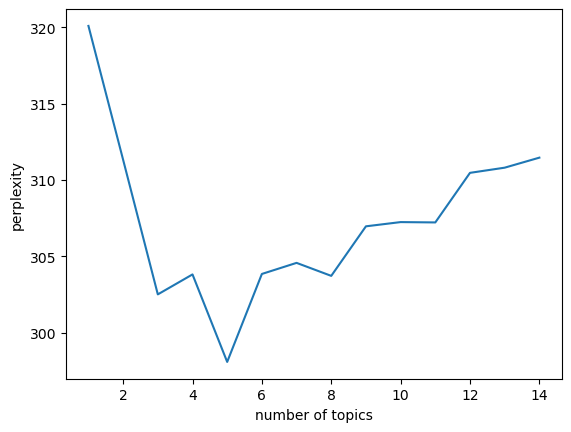

In [13]:
plexs = []
scores = []
n_max_topics = 16  # 这里值可自行设置
for i in range(1,n_max_topics):
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=666)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))
 
n_t=15 # 区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t))
plt.plot(x,plexs[1:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()